# Solar Azimuth and Zenith Tracker

## Version 2 (Slow Edition)

This is the first app of a series, where i create simple apps to improve my programming skills.

An application which tracks the sun according to the latitude and longtitude or the address (defined by google) of the location. Based on stackoverflow answers.


Test for Stirling Scotland, Sydney Australia, Quito Ecuador

## Asking user for location

In [90]:
#import astropy
import astropy.coordinates as coord
import astropy.units as u
from astropy.time import Time

#import random and math libraries
import math as m
import random as r

#import Angles convertor + numpy
from astropy.coordinates import Angle
import numpy as np

#import utc time now
from datetime import datetime,timezone,timedelta 
now_utc = datetime.now(timezone.utc)

#import pandas
import pandas as pd

#ask user: coordinates or address
while True:
    try:
        selector = int(input('Enter: 1 for address, 2 for coordinates, 0 for defaults: '))
        break
    except:
        print('Not Valid, Enter: 1 for address, 2 for coordinates, 3 for defaults: ')
#print(selector)

#Option 0: defaults
if selector == 0: 
    longt,latit,hei = 0,0,0
    print('Longtitude:',longt , 'Latitude:',latit,'Height:',hei)
    
#Option 1: ask user an address
#Work in progress for wrong addresses
if selector == 1:
    name = input('Enter an address: ')
    if name == '':
        name = 'Stirling UK'
    print('The address is:', name)

#Option 2: ask user an address
if selector == 2 :
    try:
        longt = int(input('Enter longtitude or 0 for default: '))
        if longt == 0 : longt = 0
        latit = int(input('Enter latitude or 0 for default: '))
        if latit == 0 : latit = 0
        hei = int(input('Enter height or 0 for default: '))
        if hei == 0 : hei = 0
        print('Longtitude:',longt , 'Latitude:',latit,'Height:',hei)
    except:
        longt,latit,hei = 0,0,0
        print('Longtitude:',longt , 'Latitude:',latit,'Height:',hei)

Enter: 1 for address, 2 for coordinates, 0 for defaults: quito ecuador
Not Valid, Enter: 1 for address, 2 for coordinates, 3 for defaults: 
Enter: 1 for address, 2 for coordinates, 0 for defaults: 1
Enter an address: quito ecuador
The address is: quito ecuador


In [91]:
sun_time = Time(now_utc) #UTC time
if selector == 1:
    #print('Selector: ',selector)
    loc = coord.EarthLocation.of_address(name) # anything the google geocoding API resolves
if (selector == 2) or (selector == 0):
    #print('Selector: ',selector)
    loc = coord.EarthLocation(lon=longt,lat=latit,height=hei)

print('Geocentric coordinates <<Earth diameter = 6371km>> x(greenwith),y(),z(North Pole)',loc)

Geocentric coordinates <<Earth diameter = 6371km>> x(greenwith),y(),z(North Pole) (1270241.92358368, -6250321.62380727, -24344.42721293) m


## Finding the sun, for every 30 min, for a year. for default settings

In [92]:
sun_test_Time = Time(now_utc)
print(sun_test_Time)
altaz = coord.AltAz(obstime=sun_time, location=loc)
#help(altaz)
zen_az = coord.get_sun(sun_time).transform_to(altaz).az
zen_alt = coord.get_sun(sun_time).transform_to(altaz).alt


print('Sun Elevation  Degrees now (above 0 day):',zen_alt)
print('Sun Azimuth    Degrees now              :',zen_az)

# year = 365 days * 24 hours * 60 minutes = (minute definition)
# year = 365 days * 24 hours (hours definition)
# initiallizing lists and the timescale of study
print('Warning Long Computations')
while True:
    try:
        time_range_mine = int(input('Select number of datapoints (integer) for solar reading, choose 0 for default 17520 point : '))
        if time_range_mine == 0:
            time_range_mine = 17520
        break
    except:
        print('Enter an integer or 0')
        
while True:
    try:
        delta_min = int(input('Select minutes (integer) between each solar reading, choose 0 for default 30 minutes : '))
        if delta_min == 0:
            delta_min = 30
        break
    except:
        print('Enter an integer or 0')
        
# TAKES A LOT OF TIME
sun_az = []
sun_alt = []
time_points = []
#minutes
for timepoint in range(time_range_mine):
    #delta of hours
    #
    past_date_before = Time(now_utc) - timedelta(minutes = (delta_min * timepoint))
    #print(past_date_before)
    altaz = coord.AltAz(obstime=past_date_before, location=loc)
    sun_az.append(coord.get_sun(past_date_before).transform_to(altaz).az)
    sun_alt.append(coord.get_sun(past_date_before).transform_to(altaz).alt)
    time_points.append(past_date_before)
    #print('Sun Elevation Degrees (above 0 day):',zen_alt)
    #print('Sun  Azimuth  Degrees              :',zen_ang)

#converting lists to pandas     
sun_tuple = list(zip(sun_az,sun_alt,time_points))
sun_df = pd.DataFrame(sun_tuple, columns=['Azimuth','Elevation','Time'])

2020-12-21 06:25:07.576154
Sun Elevation  Degrees now (above 0 day): -60d27m15.8093s
Sun Azimuth    Degrees now              : 144d25m24.2269s
Warning Long Computations
Select number of datapoints (integer) for solar reading, choose 0 for default 17520 point : 0
Select minutes (integer) between each solar reading, choose 0 for default 30 minutes : 0


## Before and after angle transformation

           Azimuth        Elevation                        Time
0  144d25m24.2269s  -60d27m15.8093s  2020-12-21 06:25:07.576154
1  156d56m49.9644s  -64d09m03.3942s  2020-12-21 05:55:07.576154
2  172d39m54.1489s  -66d08m13.3375s  2020-12-21 05:25:07.576154
3  189d39m45.1753s  -65d58m58.4144s  2020-12-21 04:55:07.576154
4   205d00m17.325s  -63d43m34.5208s  2020-12-21 04:25:07.576154
   Azimuth Elevation                        Time
0  144.423  -60.4544  2020-12-21 06:25:07.576154
1  156.947  -64.1509  2020-12-21 05:55:07.576154
2  172.665   -66.137  2020-12-21 05:25:07.576154
3  189.663  -65.9829  2020-12-21 04:55:07.576154
4  205.005  -63.7263  2020-12-21 04:25:07.576154


<AxesSubplot:>

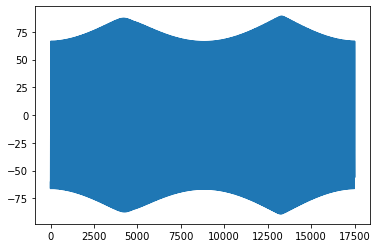

In [93]:
print(sun_df.head())
sun_df2 = sun_df.copy()

#print(type(sun_df2['Azimuth'][0]))
#var_test = Angle(sun_df2['Azimuth'][0]).degree
#print(var_test)
for i in range(len(sun_df2.index)):
    sun_df2['Azimuth'][i] = Angle(sun_df2['Azimuth'][i]).degree
    sun_df2['Elevation'][i] = Angle(sun_df2['Elevation'][i]).degree
#print(type(sun_df2['Azimuth'][0]))
#print(type(sun_df2['Time'][0]))
print(sun_df2.head())
#create graph
%matplotlib inline
sun_df2['Elevation'].plot()

<AxesSubplot:>

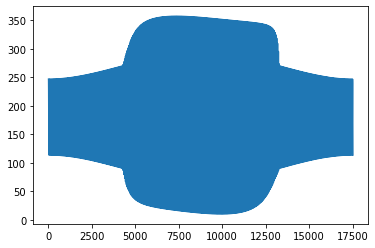

In [97]:
sun_df2['Azimuth'].plot()

Timepoints with light : 8762 Timepoints of whole Year : 17520


<AxesSubplot:>

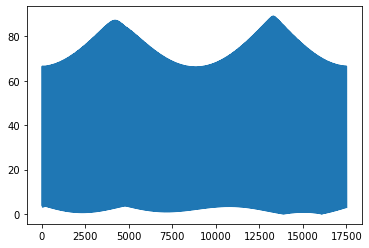

In [96]:
sun_df2 = sun_df2[sun_df2['Elevation'] >= 0]
timePointsOfSun = len(sun_df2.index)
print("Timepoints with light :",timePointsOfSun, "Timepoints of whole Year :",len(sun_df.index))

#create graph without negatives
%matplotlib inline
sun_df2['Elevation'].plot()

In [98]:
deg_z_solar_max = 90  # Elevation max
deg_z_solar_min = 0  # Elevation min
deg_x_solar_max = 360 # Azimuth max
deg_x_solar_min = 0 # Azimuth min
number_of_tries = 10000
tally_saved = 0
index_mine = sun_df2.index
#print(len(index_mine))

elev_column = sun_df2['Elevation']
#print(len(elev_column))
azim_column = sun_df2['Azimuth']
#print(len(azim_column))

## The test against multiple angles of the solar panel to find the optimal angle

In [99]:

#tally2=[]
#tallyel=[]
#talltaz=[]
tally_saved2=[]
opt_elev_angle2=[]
opt_azim_angle2=[]
print('Takes a lot of time')

for i in range(number_of_tries):
    deg_gen_z_solar = r.randint(deg_z_solar_min,deg_z_solar_max)
    deg_gen_x_solar = r.randint(deg_x_solar_min,deg_x_solar_max)
    
    #solar panel angles
    deg_z_solar = deg_gen_z_solar #or Elevation
    rad_z_solar = m.radians(deg_z_solar) #to radians
    #print(rad_z_solar)
    deg_x_solar = deg_gen_x_solar #or Azimuth
    rad_x_solar = m.radians(deg_x_solar) #to radians

    z_vector_solar = m.sin(rad_z_solar)
    #print("z-vector solar",z_vector_solar)
    x_vector_solar = m.cos(rad_z_solar)*m.cos(rad_x_solar)
    #print("x-vector solar",x_vector_solar)
    y_vector_solar = m.cos(rad_z_solar)*m.sin(rad_x_solar)
    #print("y-vector solar",y_vector_solar) 
    
    tally=0
    
    
    for ii in index_mine:
        #print(rad_x_solar)
        deg_z = elev_column[ii] #or Elevation
        rad_z = m.radians(deg_z) #to radians
        #print(rad_z)
        deg_x = azim_column[ii] #or Azimuth
        rad_x = m.radians(deg_x) #to radians
        #print(rad_x)
        z_vector_base = m.sin(rad_z)
        #print("z-vector",z_vector_base)
        x_vector_base = m.cos(rad_z)*m.cos(rad_x)
        #print("x-vector",x_vector_base)
        y_vector_base = m.cos(rad_z)*m.sin(rad_x)
        #print("y-vector",y_vector_base)
    
        dot_product = x_vector_base*x_vector_solar + y_vector_base*y_vector_solar + z_vector_base*z_vector_solar
        #print(dot_product)
        tally += dot_product
        #tally2.append(tally)
        #tallyel.append(deg_z)
        #talltaz.append(deg_x)
    if tally > tally_saved:
        tally_saved = tally
        tally_saved2.append(tally_saved)
        opt_elev_angle = deg_gen_z_solar
        opt_elev_angle2.append(opt_elev_angle)
        opt_azim_angle = deg_gen_x_solar
        opt_azim_angle2.append(opt_azim_angle)
print('Solar_panel_Elevation =',opt_elev_angle,'Solar_panel_Azimuth =',opt_azim_angle)

Takes a lot of time
Solar_panel_Elevation = 89 Solar_panel_Azimuth = 2


In [89]:
#print(tally2)
#print(tallyel)
#print(talltaz)
print(tally_saved)
print(tally_saved2)
print(opt_elev_angle2)
print(opt_azim_angle2)

5244.353420657813
[2877.757665950786, 4642.657201844814, 5048.104584500047, 5089.916577302744, 5231.42298982305, 5241.0807354369135, 5242.840136047555, 5243.484986294228, 5244.353420657813]
[64, 83, 47, 51, 61, 61, 60, 58, 59]
[190, 57, 17, 20, 7, 1, 358, 360, 360]


With 10000 tries results are logical with the reality.
Quito   elevation 89 azimuth 2 Degrees (solar panel horizontal to the ground)
Sydney  elevation 59 azimuth 360 Degrees (looking north)
Stirling elevation 43 azimuth 180 Degrees (looking south) (elevation closer to zero as compared to Sydney its closer to the pole)   